# Linear Regression with TF Estimator API

---

Created as a part of Google's Machine Learning Course.

### Implement a Linear Regression on the 1990 California Census Dataset.


---


### Setup

In [0]:
# Imports

import math
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.data import Dataset

from sklearn import metrics

In [0]:
# Loading the Dataset

cal_house = pd.read_csv("https://storage.googleapis.com/ml_universities/california_housing_train.csv", sep=",")

In [3]:
cal_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
cal_house.index

RangeIndex(start=0, stop=17000, step=1)

In [0]:
# Reindex the dataframe

cal_house = cal_house.reindex(np.random.permutation(cal_house.index))

In [0]:
# Scaling the 'Median House Data' to THOUSANDS

cal_house["median_house_value"] /= 1000.0

In [7]:
cal_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
52,-115.52,33.12,38.0,1327.0,262.0,784.0,231.0,1.8793,60.800
5356,-118.15,34.10,36.0,3514.0,818.0,2277.0,828.0,3.1211,229.300
13539,-121.97,38.35,17.0,5678.0,1116.0,3182.0,1135.0,3.7388,122.000
2585,-117.65,33.49,16.0,2223.0,454.0,628.0,382.0,4.3603,248.800
7952,-118.41,34.18,35.0,2785.0,663.0,1631.0,614.0,3.9038,276.100
1979,-117.31,34.13,36.0,1076.0,283.0,773.0,224.0,2.6307,66.400
10871,-120.83,38.74,17.0,3685.0,775.0,1714.0,734.0,2.2269,128.300
10991,-120.93,37.67,6.0,3491.0,657.0,2075.0,644.0,3.3844,138.500
8610,-118.53,34.45,10.0,5509.0,969.0,3002.0,959.0,5.5981,220.100
13849,-122.02,37.40,33.0,2015.0,484.0,1285.0,419.0,4.0655,226.800


In [8]:
cal_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
52,-115.52,33.12,38.0,1327.0,262.0,784.0,231.0,1.8793,60.8
5356,-118.15,34.10,36.0,3514.0,818.0,2277.0,828.0,3.1211,229.3
13539,-121.97,38.35,17.0,5678.0,1116.0,3182.0,1135.0,3.7388,122.0
2585,-117.65,33.49,16.0,2223.0,454.0,628.0,382.0,4.3603,248.8
7952,-118.41,34.18,35.0,2785.0,663.0,1631.0,614.0,3.9038,276.1


In [9]:
# Descrbe the Data

cal_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


### Select the 'Input Feature' as the 'Total Rooms' column in the dataset.

In [0]:
total_rooms = cal_house[["total_rooms"]]

In [0]:
# Setting the Numeric Feature column

feature_col = [tf.feature_column.numeric_column("total_rooms")]

### Setting the Target as the 'Median House Value'

In [0]:
targets = cal_house["median_house_value"]

## Configuration of the Linear Regressor

In [0]:
# Gradient Descent Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)

In [14]:
# Linear Regressor

linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_col, optimizer=optimizer)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbmztwvj_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa7efb29cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Defining an Input Function

In [0]:
def input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
  
  # 1. Convert the PANDAS data into NP Arrays
  
  features = {key:np.array(value) for key, value in dict(features).items()}
  
  # 2. Create a Dataset
  
  ds = Dataset.from_tensor_slices((features, targets))
  
  # 3. Configure for batch and repeat
  
  ds = ds.batch(batch_size).repeat(num_epochs)
  
  # 4. Shuffle
  
  if shuffle:
    ds = ds.shuffle(buffer_size = 10000)
  
  # 5. Create Iterator and return the data
  
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

## Training the Model

In [16]:
_ = linear_regressor.train(input_fn = lambda:input_fn(total_rooms, targets),steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpbmztwvj_/model.ckpt.
INFO:tensorflow:loss = 64414.44, step = 1
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmpbmztwvj_/model.ckpt.
INFO:tensorflow:Loss for final step: 5863.2676.


## Evaluating the Model

In [17]:
# 1. Creating an input function to predict the values

predict_input =lambda: input_fn(total_rooms, targets, num_epochs=1, shuffle=False)

# 2. Calling the 'predict' method on the linear_regressor

predictions = linear_regressor.predict(input_fn=predict_input)

# 3. Formatting the predictions as NP array.

predictions = np.array([item['predictions'][0] for item in predictions])

# 4. MSE and RMSE

mse = metrics.mean_squared_error(predictions, targets)
rmse = math.sqrt(mse)

print ("Mean Squared Error (on training data):\t", mse)
print ("Root Mean Squared Error (on training data):\t", rmse)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbmztwvj_/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mean Squared Error (on training data):	 50907.14018921237
Root Mean Squared Error (on training data):	 225.62610706479063


### Comparing Error to data stats

In [18]:
min_house_value = cal_house["median_house_value"].min()
max_house_value = cal_house["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print ("Min. Median House Value:\t" , min_house_value)
print ("Max. Median House Value:\t" , max_house_value)
print ("Difference between Min and Max:\t" , min_max_difference)
print ("Root Mean Squared Error:\t" , rmse)

Min. Median House Value:	 14.999
Max. Median House Value:	 500.001
Difference between Min and Max:	 485.00199999999995
Root Mean Squared Error:	 225.62610706479063


In [0]:
# Creating a Data Sample

sample = cal_house.sample(n= 300)

### Plot the Data

In [0]:
x_min = sample["total_rooms"].min()
x_max = sample["total_rooms"].max()

In [0]:
# Retrieve the final weight and bias generated during training.

weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

In [0]:
# Get the predicted median_house_values for the min and max total_rooms values.

y_min = weight * x_min + bias 
y_max = weight * x_max + bias

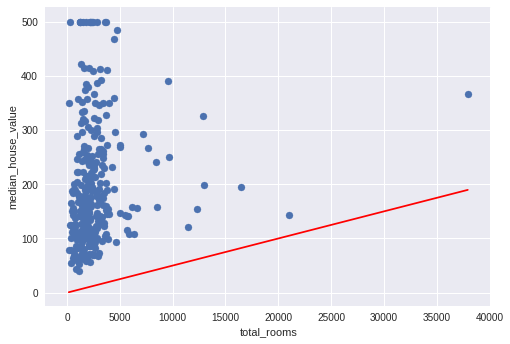

In [23]:
# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_min, x_max], [y_min, y_max], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

## TWEAKING MODEL HYPERPARAMETERS

In [0]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  tf.logging.set_verbosity(tf.logging.ERROR)
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = cal_house[[my_feature]]
  my_label = "median_house_value"
  targets = cal_house[my_label]

  # Create feature columns
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions
  training_input_fn = lambda:input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = cal_house.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print ("Training model...")
  print ("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print ("  period", period, " : " ,root_mean_squared_error)
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print ("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  calibration_data.describe()

  print ("Final RMSE (on training data):\t" , root_mean_squared_error)

Training model...
RMSE (on training data):
  period 0  :  236.3194743038768
  period 1  :  235.1053976271587
  period 2  :  233.89756715619694
  period 3  :  232.69608198364818
  period 4  :  231.501042199977
  period 5  :  230.31254612921933
  period 6  :  229.1306956151881
  period 7  :  227.9555941304587
  period 8  :  226.78734626795807
  period 9  :  225.62605897578212
Model training finished.
Final RMSE (on training data):	 225.62605897578212


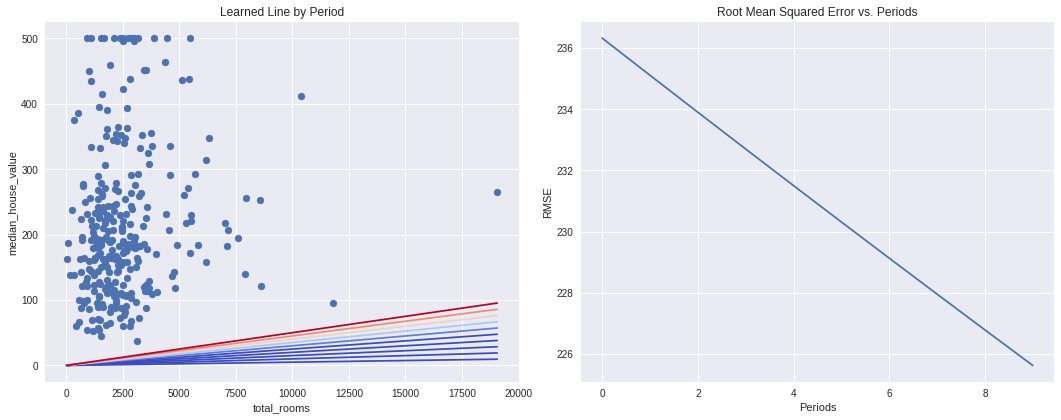

In [25]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

Training model...
RMSE (on training data):
  period 0  :  196.42295153068363
  period 1  :  180.5372663303317
  period 2  :  196.4223423729645
  period 3  :  170.15788319584345
  period 4  :  265.7629416893175
  period 5  :  180.53199885228037
  period 6  :  239.99239289433675
  period 7  :  196.4102357976806
  period 8  :  180.4882340854338
  period 9  :  196.35569036369893
Model training finished.
Final RMSE (on training data):	 196.35569036369893


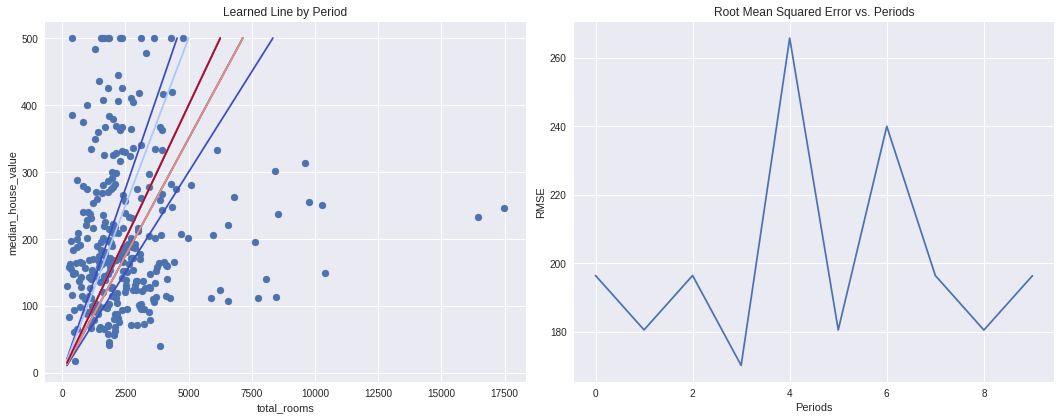

In [26]:
train_model(
    learning_rate=0.001,
    steps=1000,
    batch_size=1
)

Training model...
RMSE (on training data):
  period 0  :  167.79573511740452
  period 1  :  167.7962860753616
  period 2  :  171.73953717166683
  period 3  :  168.8439509149382
  period 4  :  175.65602588463005
  period 5  :  175.9213016701749
  period 6  :  175.92058593348136
  period 7  :  170.358328553161
  period 8  :  178.32264873600462
  period 9  :  173.8476407471712
Model training finished.
Final RMSE (on training data):	 173.8476407471712


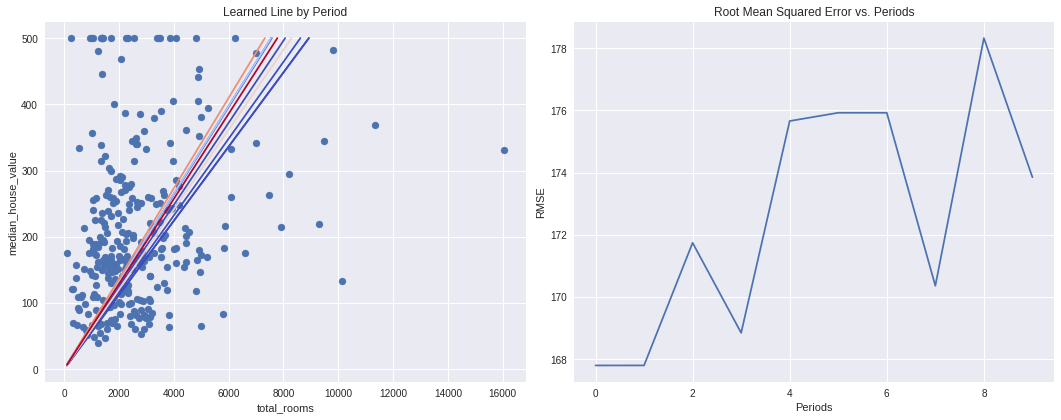

In [27]:
train_model(
    learning_rate=0.0002,
    steps=1000,
    batch_size=10
)

## Trying out 'Population' feature for Regression

Training model...
RMSE (on training data):
  period 0  :  225.6287679912825
  period 1  :  214.62480493104346
  period 2  :  204.86181570817732
  period 3  :  196.58753394897047
  period 4  :  189.79705810333428
  period 5  :  184.45747533628045
  period 6  :  180.75510400073117
  period 7  :  178.56031029404267
  period 8  :  177.0455608194291
  period 9  :  176.16179132807048
Model training finished.
Final RMSE (on training data):	 176.16179132807048


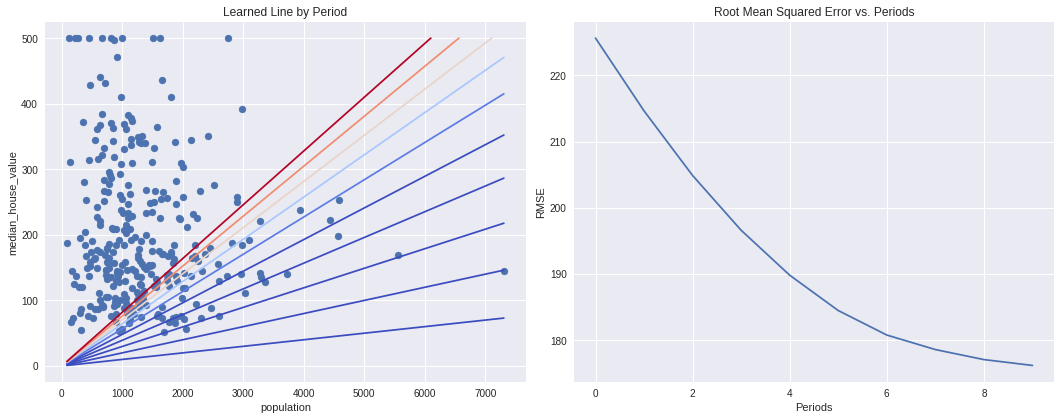

In [28]:
train_model(
    learning_rate=0.00002,
    steps=1000,
    batch_size=5,
    input_feature="population"
)